#**Bike and Car Classification**
###**Nombre:** Pablo Ortiz
###**Matrícula:** A01023791
###**Index:**
1. Importe de librerías y configuración
2. Lectura y normalización de datos
3. Primer iteración del modelo

  3.1. Diseño de la CNN

  3.2. Entrenamiento de la CNN

  3.3. Evaluación de la CNN

4. Segunda iteración del modelo

  4.1. Diseño de la CNN

  4.2. Entrenamiento de la CNN

  4.3. Evaluación de la CNN

5. Guardamos el modelo



## 1. Importe de librerías y configuración

Comenzamos importando las librerías necesarias y montando el directorio que contiene el repositorio de datos. Además, configuramos TensorFlow para aprovechar la GPU de Colab, lo que acelera el proceso de entrenamiento. Por último, verificamos que la lectura de imágenes se realice correctamente y eliminamos imágenes corruptas.

In [ ]:
#Importe de librerías y montamos el drive
import tensorflow as tf
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import imghdr
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Nos movemos al directorio del proyecto
os.chdir("/content/gdrive/My Drive/Concentración IA/Proyecto Clasificación de Imagenes/")

In [ ]:
#Configuramos TF para utilizar GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

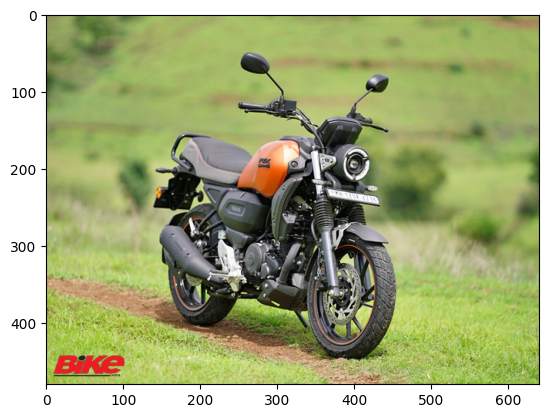

In [ ]:
#Mostramos una imagen de ejemplo
img = cv2.imread("Car-Bike-Dataset/Bike/Bike (1).jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
#Verificamos que todas las imágenes están en formato correcto y, en caso de que no, eliminamos.
data_dir = 'Car-Bike-Dataset/'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

## 2. Lectura y normalización de datos

Seguidamente, empleamos el API de TensorFlow para leer los datos, constatando la presencia de 3981 imágenes distribuidas en 2 clases únicas. Con el propósito de confirmar las clases, visualizamos 4 imágenes. Posteriormente, normalizamos los datos, asegurando que los valores de los píxeles estén en el rango de 0 a 1. Para validar la correcta ejecución de la normalización, exhibimos nuevamente algunas imágenes.

In [ ]:
#Usamos TF para leer los 3981 datos divididos en 2 clases
data = tf.keras.utils.image_dataset_from_directory("Car-Bike-Dataset/")

Found 3981 files belonging to 2 classes.


In [ ]:
#Creamos el iterador de Numpy para poder extraer y visualizar los datos.
data_it = data.as_numpy_iterator()

In [ ]:
#Agarramos un batch de imágenes
batch = data_it.next()

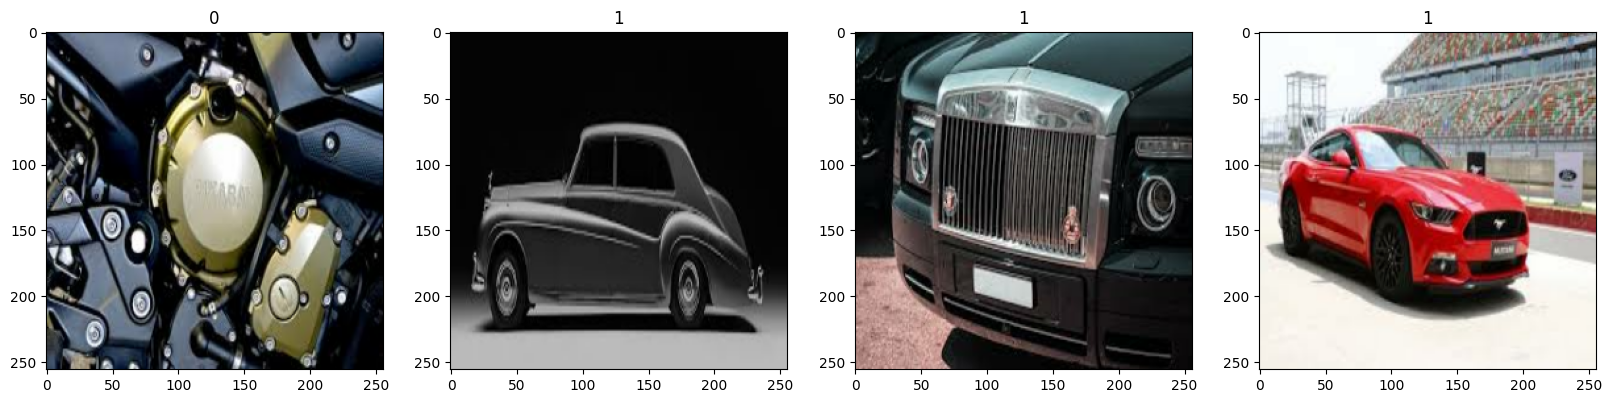

In [ ]:
#Mostramos 4 imágenes con sus respectivas clases
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Normalizamos el valor de los pixeles para que esté entre 0 y 1.
data = data.map(lambda x,y: (x/255,y))

In [ ]:
#De nuevo creamos el iterador de Numpy
scaled_iterator = data.as_numpy_iterator()

In [ ]:
#Agarramos un batch de imágenes
batch = scaled_iterator.next()

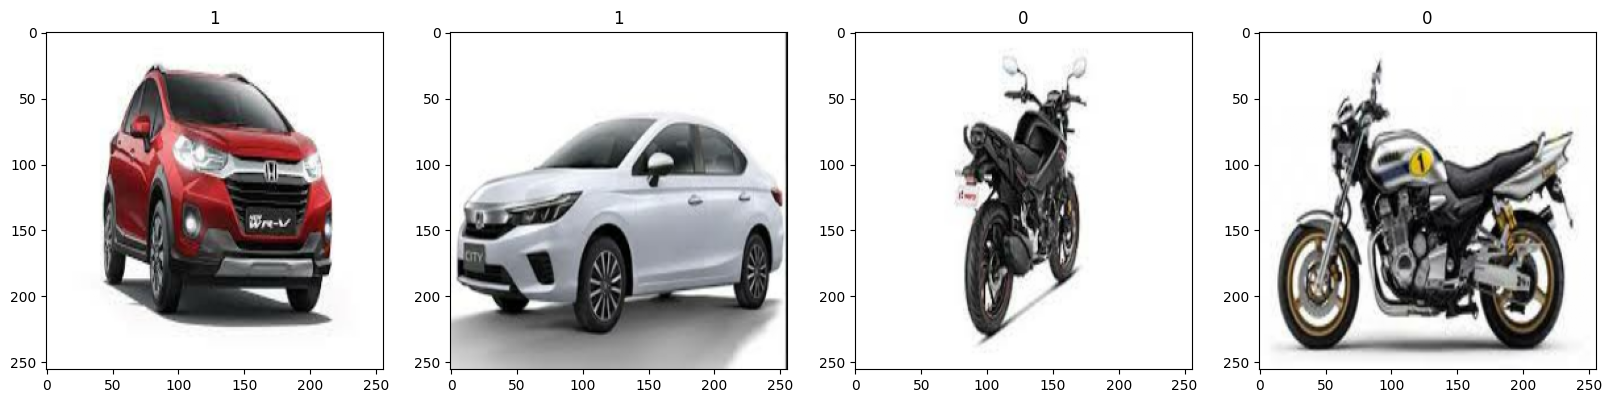

In [ ]:
#Confirmamos que la normalización de datos se realizó correctamente
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 3. Primer iteración del modelo

### 3.1. Diseño de la CNN

Para el entrenamiento de los modelos dividiremos las imágenes para tener un 70% de entrenamiento, 20% de validación y 10% de prueba final. Después crearemos una CNN sumamente básica y veremos como aprende los datos.

In [ ]:
#Agarramos el número de batches correspondientes al 70%, 20% y 10%
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
#Extramos la data de entrenamiento, validación y prueba
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
#Creamos el modelo
model = Sequential()

In [ ]:
#Populamos el modelo con las capaz convolutivas, de MaxPooling y densas.
model.add(Conv2D(16, (3,3), 1, activation='sigmoid', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='sigmoid'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='sigmoid'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compilamos el modelo
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#Imprimimos la arquitectura.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2. Entrenamiento de la CNN

Para el entrenamiento del modelo utilizaremos 20 epocas y guardaremos los resultados en el archivo "logs".

In [ ]:
#Creamos el directorio de "logs"
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#Realizamos el entrenamiento
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
87/87 [==============================] - 46s 405ms/step - loss: 2.4103 - accuracy: 0.5093 - val_loss: 0.7171 - val_accuracy: 0.4812
Epoch 2/20
87/87 [==============================] - 32s 364ms/step - loss: 0.6942 - accuracy: 0.4989 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 4/20
87/87 [==============================] - 22s 250ms/step - loss: 0.6943 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 5/20
87/87 [==============================] - 21s 234ms/step - loss: 0.6951 - accuracy: 0.4881 - val_loss: 0.6938 - val_accuracy: 0.4625
Epoch 6/20
87/87 [==============================] - 21s 234ms/step - loss: 0.6939 - accuracy: 0.4889 - val_loss: 0.6927 - val_accuracy: 0.5263
Epoch 7/20
87/87 [==============================] - 21s 236ms/step - loss: 0.6947 - accuracy: 0.4853 - val_loss: 0.6934 - val_accuracy: 0.4888
Epoch 8/20
87/87 [==============================] - 33s 372ms/step - loss: 0.6952 - accuracy: 0.4864 - val_loss: 0.6936 - val_accuracy: 0.4737

### 3.3 Evaluación de la CNN

Como podemos observar en las siguientes gráficas, el modelo es bastante malo clasificando las imágenes. El valor de accuracy no mejora y se mantiene entre 47% y 53% que, para las clases tan balanceadas, es esencialmente como escoger al azar. Adicionalemnte, podemos ver como la precisión y el recall son 0% y el accuracy final es del 47%. Es evidente que el modelo necesita mucha más complejidad para poder aprender los patrones correctos.

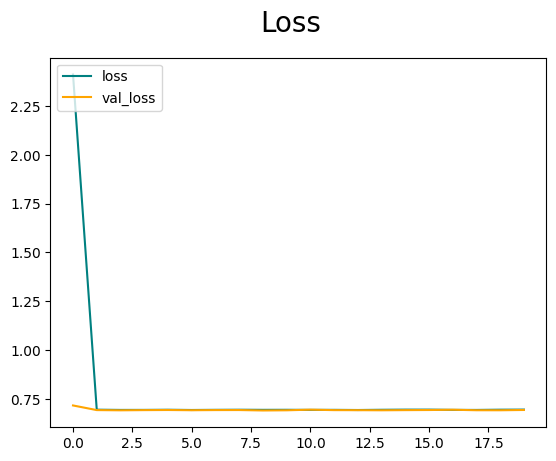

In [ ]:
#Imprimimos el loss y vemos como a partir de la primer época no se reduce más
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

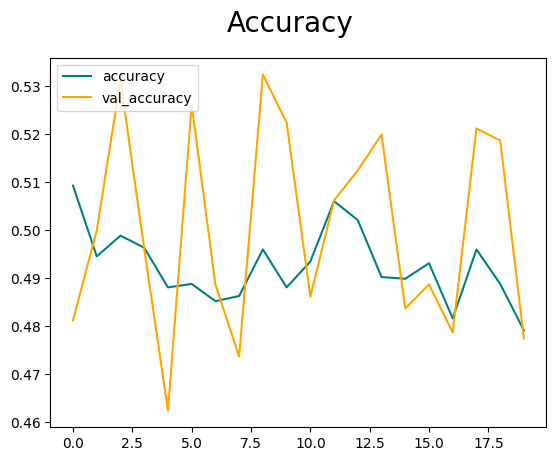

In [ ]:
#Imprimimos el accuracy y vemos como simplemente itera entre 47% y 53%-
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Obtenemos la precisión, recall y accuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
#Hacemos las predicciones de la data de prueba
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 29ms/step


In [ ]:
#Imprimimos los resultados finales de Precisión, Recall y Accuracy y vemos que el modelo tiene un terrible desempeño.
print("Precision: {}".format(pre.result()), "Recall: {}".format(re.result()), "Accuracy: {}".format(acc.result()))

Precision: 0.0 Recall: 0.0 Accuracy: 0.46875


## 4. Segunda iteración del modelo

### 4.1. Diseño de la CNN

Para el segundo modelo, crearemos un modelo mucho más complejo mejorando los siguientes elementos.
* Agregamos más capaz para incrementar la complejidad del modelo
* Cambiamos las funciones de activación de las capaz ocultas para evitar gradientes que desaparecen o se atoran
* Agregamos capaz de Dropout para evitar overfitting

In [ ]:
#Creamos el modelo
model_2 = Sequential()

In [ ]:
#Populamos la red con los nuevos cambios mencionados anteriormente
model_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(32, (3,3), 1, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compilamos el modelo
model_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#Imprimimos la arquitectura.
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 dropout (Dropout)           (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)       

### 4.2. Entrenamiento de la CNN

Para el entrenamiento del modelo utilizaremos 40 epocas y guardaremos los resultados en el archivo "logs_2".

In [ ]:
#Creamos el directorio de "logs_2"
logdir='logs_2'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#Realizamos el entrenamiento
hist_2 = model_2.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
87/87 [==============================] - 36s 356ms/step - loss: 0.6432 - accuracy: 0.6203 - val_loss: 0.5359 - val_accuracy: 0.7538
Epoch 2/40
87/87 [==============================] - 22s 246ms/step - loss: 0.4918 - accuracy: 0.7672 - val_loss: 0.4142 - val_accuracy: 0.8325
Epoch 3/40
87/87 [==============================] - 33s 376ms/step - loss: 0.3548 - accuracy: 0.8545 - val_loss: 0.3300 - val_accuracy: 0.8950
Epoch 4/40
87/87 [==============================] - 28s 316ms/step - loss: 0.2701 - accuracy: 0.8958 - val_loss: 0.2598 - val_accuracy: 0.8988
Epoch 5/40
87/87 [==============================] - 29s 335ms/step - loss: 0.2271 - accuracy: 0.9102 - val_loss: 0.2417 - val_accuracy: 0.9062
Epoch 6/40
87/87 [==============================] - 24s 263ms/step - loss: 0.2103 - accuracy: 0.9163 - val_loss: 0.1998 - val_accuracy: 0.9162
Epoch 7/40
87/87 [==============================] - 36s 411ms/step - loss: 0.1899 - accuracy: 0.9249 - val_loss: 0.1813 - val_accuracy: 0.9275

### 4.3 Evaluación de la CNN

Finalmente, evaluamos el segundo modelo y vemos cómo mejora radicalmente. Primero vemos la evolución del "Loss" y el "Accuracy" y, aunque el modelo se desemeña sumamente bien y cuenta con capaz de dropout, presenta un poco de overfitting.

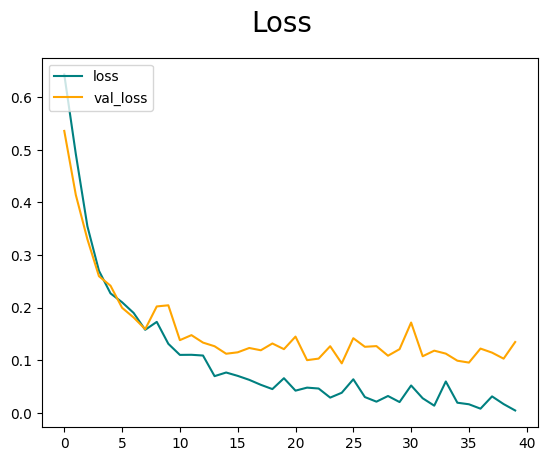

In [ ]:
#Imprimimos el loss y vemos como mejora continuamente aunque a partir de la época 10 presenta un poco de overfitting
fig = plt.figure()
plt.plot(hist_2.history['loss'], color='teal', label='loss')
plt.plot(hist_2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

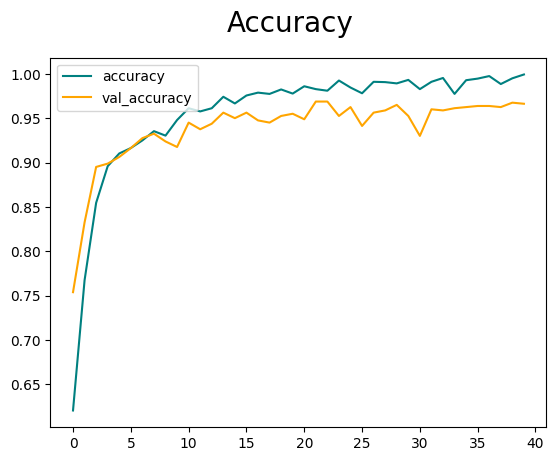

In [ ]:
#Imprimimos el accuracy y vemos como mejora continuamente aunque a partir de la época 10 presenta un poco de overfitting
fig = plt.figure()
plt.plot(hist_2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Obtenemos la precisión, recall y accuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
#Hacemos las predicciones de la data de prueba
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model_2.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 35ms/step


In [ ]:
#Imprimimos los resultados finales de Precisión, Recall y Accuracy y vemos que el modelo tiene un terrible desempeño.
print("Precision: {}".format(pre.result()), "Recall: {}".format(re.result()), "Accuracy: {}".format(acc.result()))

Precision: 0.9637305736541748 Recall: 0.9738219976425171 Accuracy: 0.96875


## 5. Guardamos el modelo

In [ ]:
#Guardamos el modelo
model.save(os.path.join('models','imageclassifier.h5'))